The dashboard prototype we’ll be building step-by-step is inspired by my Global Precious Metals and Stones Export Research dashboard recently included in the Dash Example App Gallery. I’ll go into detail about how all the key elements of its entry page were created.

This is what we should end up with:

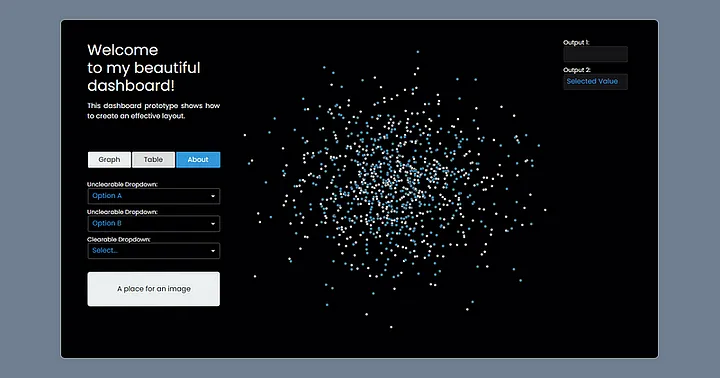

installing the packages

Essentially, in Dash, you are not creating a dashboard but a full-fledged web application that looks like a dashboard. Therefore, the creation process is very similar to that of a web page.

To build our layout, we’ll use several sets of elements:

    HTML elements to develop the dashboard structure;
    CSS to define how it looks;
    Pre-designed Dash and Bootstrap components to facilitate the creation process.

To plot the graph, we’ll also need the Numpy, Random, and Plotly libraries. Plotly is installed with Dash and Random with Python, so just install Numpy if you don’t already have it.

In [ ]:
#!pip install dash
#!pip install dash-bootstrap-components

In [ ]:
from dash import Dash, html, dcc
import dash_bootstrap_components as dbc

We’ve just downloaded all the packages we need to build the layout:

    With Dash, we’ll launch our application.
    HTML components in Dash are similar to HTML tags. For example, Dash commands html.Div(), html.P(), or html.Img() stand for <div>, <p>, or <img>, respectively. Here’s the full component list.
    Dash Core Components (DCC) store ready-set interactivity elements a.k.a. graphs, dropdowns, buttons, or temporary storages. That is, by applying the commands dcc.Dropdown() or dcc.Graph(), we can create a dropdown or call a Plotly graph, respectively. All possible components are listed here.
    Dash Bootstrap Components (DBC) are in many cases a more effective substitute for HTML and DCC elements, and even for the entire CSS file. We’ll build the dashboard body, all of its buttons, and set the overall page styling using DBC commands. Here you can read more about Dash Bootstrap elements.

# Nested Dashboard Structure

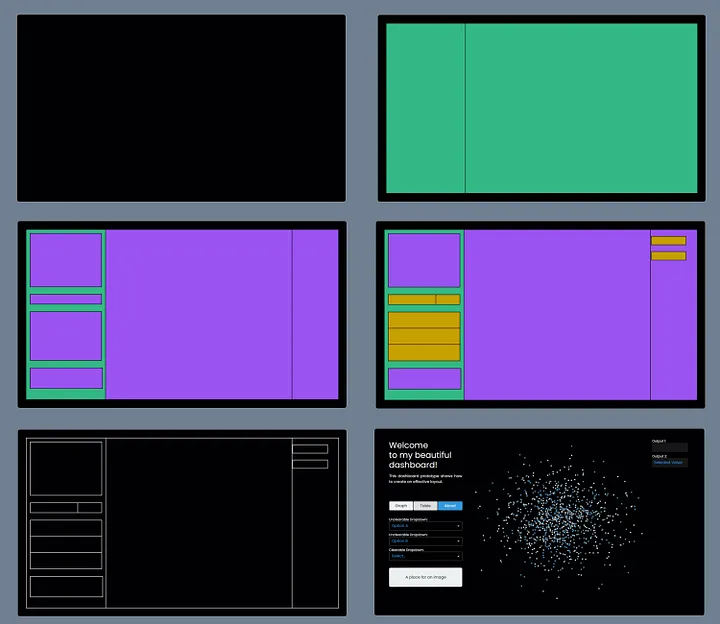

Essentially, a Dash application is a structure of nested rectangular DIV containers. In these containers, we place graphs, texts, images, and navigation elements. Taking into account the background, our page consists of several layers:

# Launching the application

Let’s start creating our dashboard. First, we launch the Dash application:

In [ ]:
app = Dash(__name__)

Next, we create a layout; for now, it is just an empty DIV container.

In [ ]:
app.layout = html.Div()

Finally, we run our app with the development server in debug mode:

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True, port=8000)

Our application has been created! At this point, it’s just a blank page. If you use a Jupyter Notebook, you can see it directly in your output window; or you can expand it to full screen by opening it on the development server, http://127.0.0.1:8000/

The last four digits of the server link are the port number; by default, it’s 8050. If the app stops updating while being developed, put another port number in the application code and in the link — for example, 8051.
Creating the dashboard body

To create the dashboard body, we’ll use a Bootstrap container. This is the top-level element of our dashboard grid, which sets its width and “contains” all of its child elements. Replace our placeholder html.Div() with dbc.Container(). To make our dashboard take up 100% of the width of any browser window, make it fluid by setting fluid=True.

In [ ]:
app.layout = dbc.Container(fluid=True)

For the container to appear on the screen, it must contain something, so let’s temporarily place some text in it. First, wrap the text with the html.P() element, an analogue of the HTML <p> tag, and then place it inside the container.

In [ ]:
app.layout = dbc.Container(html.P("My awesome dashboard will be here."), fluid=True)

Update the app, and voila! We see the contents of our container. It looks pretty plain so far, so let’s start styling our dashboard.
# How the dashboard is being styled

Each part of our app, either container, navigation element, or text, may be provided with a particular style: length and width, color, font, indents, and so on. General styling rules for the whole app are set in a special custom CSS file, while an individual element’s style can be detailed both in the custom CSS and right in the app’s code.

Let’s first create our custom CSS. In the same folder where our Jupyter Notebook (or our code) is run, create an “assets” folder, then an empty text file inside of it and save it as “style.css”. In this file, we’ll detail the looks of all our dashboard elements. Let’s open it.

To link the dashboard’s element with its CSS style, we provide it with a class or ID:

    A class is assigned to a single element or a group of elements in order to style them.
    An ID is assigned to a unique dashboard element to style it and/or to set up its interactivity.

An element can be given both a class and an ID, and the latter will be “stronger”, that is, if a container’s class “red” specifies the color red, while its ID “blue” specifies the blue, the container will be blue, not red.

We can also assign a style to all elements of a specific HTML tag, for example, all texts (<p>) or the entire page (<body>), without specifying their class or ID.

To style the body of our dashboard, we’ll provide it with a class. The class is set inside the dashboard’s container, separated by a comma from its other contents:

In [ ]:
# Import packages
from dash import Dash, html, dash_table, dcc, callback, Output, Input
import pandas as pd
import plotly.express as px

# Incorporate data
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder2007.csv')

# Initialize the app
app = Dash()

# App layout
app.layout = [
    html.Div(children='My First App with Data, Graph, and Controls'),
    html.Hr(),
    dcc.RadioItems(options=['pop', 'lifeExp', 'gdpPercap'], value='lifeExp', id='my-final-radio-item-example'),
    dash_table.DataTable(data=df.to_dict('records'), page_size=6),
    dcc.Graph(figure={}, id='my-final-graph-example')
]

# Add controls to build the interaction
@callback(
    Output(component_id='my-final-graph-example', component_property='figure'),
    Input(component_id='my-final-radio-item-example', component_property='value')
)
def update_graph(col_chosen):
    fig = px.histogram(df, x='continent', y=col_chosen, histfunc='avg')
    return fig

if __name__ == "__main__":
    app.run_server(debug=True, port=8001)
# Run the app
#if __name__ == '__main__':
#    app.run(debug=True)


Reference:

https://dash.plotly.com/tutorial

https://plotly.com/examples/dashboards/

https://medium.com/plotly/how-to-create-a-beautiful-interactive-dashboard-layout-in-python-with-plotly-dash-a45c57bb2f3c

https://github.com/Mahmoud2227/IMDB-Dashboard

https://github.com/plotly/dash-sample-apps/blob/main/apps/dash-clinical-analytics/app.py

https://github.com/plotly/datasets/tree/master/dash-layout-tutorial